In [1]:
# importing required libraries
import matplotlib
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import silhouette_score, silhouette_samples, silhouette_score
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import pyvista as pv
import vtk
import os
from vtk import vtkStructuredPoints
from skimage import io, transform
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import matplotlib.colors as mcolors
import plotly.express as px

In [2]:
df = pd.read_csv("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Datasets/Patch13_3/Professional/FinalProfessionalPlayersDataset.csv", dtype = {'skillSlot': str, 'buildingType': str, 'lane': str, 'monster': str, "itemName": str})
df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
0,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,0.000000,554.0,581.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
1,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,1.000300,3177.0,8848.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
2,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,2.000733,2665.0,13301.0,1.0,2.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
3,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,1.932467,NaN,NaN,NaN,NaN,...,NaN,NaN,False,SkillLevelUp,1.0,NaN,NaN,NaN,NaN,TOP
4,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,3.001000,3352.0,13461.0,3.0,14.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392066,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.473867,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Locket of the Iron Solari,BOTTOM
392067,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.488683,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Control Ward,BOTTOM
392068,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.491417,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Control Ward,BOTTOM
392069,NA1_4573614609,Red,anonymous 97,na1,Kaisa,26.337567,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Null-Magic Mantle,BOTTOM


In [3]:
supp_deaths_df = df[(df["role"] == "UTILITY") & (df["eventType"] == "Death")]
supp_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
28583,EUW1_6273968397,Blue,anonymous 109,euw1,Heimerdinger,3.612900,10560.0,2950.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
28587,EUW1_6273968397,Blue,anonymous 109,euw1,Heimerdinger,5.596067,13533.0,1246.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
28597,EUW1_6273968397,Blue,anonymous 109,euw1,Heimerdinger,10.835167,10907.0,3305.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
28614,EUW1_6273968397,Blue,anonymous 109,euw1,Heimerdinger,19.374700,5576.0,7461.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
28619,EUW1_6273968397,Blue,anonymous 109,euw1,Heimerdinger,22.131900,5145.0,9603.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283708,KR_6375965891,Blue,anonymous 126,kr,Karma,8.299733,10542.0,1289.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
283716,KR_6375965891,Blue,anonymous 126,kr,Karma,12.694800,13065.0,3696.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
283721,KR_6375965891,Blue,anonymous 126,kr,Karma,14.493567,11843.0,1284.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
283723,KR_6375965891,Blue,anonymous 126,kr,Karma,15.379417,8592.0,4873.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,UTILITY


Champions' winrates

In [4]:
profiling_df = supp_deaths_df[(supp_deaths_df["victory"] == True)].copy()

In [5]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1

#print("Victories with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['victories'])
#champs_df.sort_values(by=["victories"], ascending=False)
#print(champs)
    

In [6]:
profiling_df = supp_deaths_df[(supp_deaths_df["victory"] == False)].copy()

In [7]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df2 = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df2[0])] = champs[str(champs_df2[0])] + 1
    except:
        champs[str(champs_df2[0])] = 1

champs_df2 = pd.DataFrame.from_dict(champs, orient="index", columns=['defeats'])

champs_winrate = [champs_df, champs_df2]
champs_winrate_df = pd.concat(champs_winrate, axis=1)

champsWinrates = []
for row in champs_winrate_df.iterrows():
    champsWinrates_row = {}
    if(np.isnan(row[1][0])):
        row[1][0] = 0
    if(np.isnan(row[1][1])):
        row[1][1] = 0
    champsWinrates_row["champion"] = str(row[0])
    champsWinrates_row["win rate"] = round(row[1][0]/(row[1][0] + row[1][1]), 2)
    champsWinrates_row["matches"] = row[1][0] + row[1][1]

    champsWinrates.append(champsWinrates_row)

champsWinrates_df = pd.DataFrame(champsWinrates).set_index(["champion"])
champsWinrates_df.sort_values(by=["matches", "win rate"], ascending= False)

,win rate,matches
champion,,
Ashe,0.57,127.0
Annie,0.53,88.0
Rakan,0.54,68.0
Nautilus,0.49,59.0
Lux,0.55,56.0
Karma,0.57,54.0
Heimerdinger,0.51,35.0
Pyke,0.55,33.0
Renata,0.55,29.0


In [8]:
print("This dataset contains {} matches in which the supp died at least once".format(len(np.unique(supp_deaths_df["gameId"]))))

This dataset contains 819 matches in which the supp died at least once


In [9]:
print("{} players died a total of {} times".format(len(np.unique(supp_deaths_df["summoner"])), supp_deaths_df.shape[0]))

19 players died a total of 4748 times


In [10]:
print("This Dataset contains an average of {} deaths per game".format((supp_deaths_df.shape[0]/len(np.unique(supp_deaths_df["gameId"])))))

This Dataset contains an average of 5.797313797313797 deaths per game


In [11]:
blueSide_supp_deaths_df = supp_deaths_df[supp_deaths_df["team"] == "Blue"]
blueSide_supp_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
28583,EUW1_6273968397,Blue,anonymous 109,euw1,Heimerdinger,3.612900,10560.0,2950.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
28587,EUW1_6273968397,Blue,anonymous 109,euw1,Heimerdinger,5.596067,13533.0,1246.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
28597,EUW1_6273968397,Blue,anonymous 109,euw1,Heimerdinger,10.835167,10907.0,3305.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
28614,EUW1_6273968397,Blue,anonymous 109,euw1,Heimerdinger,19.374700,5576.0,7461.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
28619,EUW1_6273968397,Blue,anonymous 109,euw1,Heimerdinger,22.131900,5145.0,9603.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283706,KR_6375965891,Blue,anonymous 126,kr,Karma,7.385033,13067.0,2057.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
283708,KR_6375965891,Blue,anonymous 126,kr,Karma,8.299733,10542.0,1289.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
283716,KR_6375965891,Blue,anonymous 126,kr,Karma,12.694800,13065.0,3696.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
283721,KR_6375965891,Blue,anonymous 126,kr,Karma,14.493567,11843.0,1284.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,UTILITY


In [12]:
gamesBlueSide = len(np.unique(blueSide_supp_deaths_df["gameId"]))
gamesBlueSide

387

In [13]:
players_df = np.unique(blueSide_supp_deaths_df["summoner"])
for player in players_df:
    temp_df = blueSide_supp_deaths_df[blueSide_supp_deaths_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))

anonymous 109 played 18 matches
anonymous 110 played 13 matches
anonymous 111 played 42 matches
anonymous 112 played 41 matches
anonymous 113 played 29 matches
anonymous 115 played 11 matches
anonymous 116 played 16 matches
anonymous 117 played 15 matches
anonymous 118 played 21 matches
anonymous 119 played 14 matches
anonymous 121 played 24 matches
anonymous 122 played 18 matches
anonymous 123 played 19 matches
anonymous 124 played 31 matches
anonymous 125 played 12 matches
anonymous 126 played 30 matches
anonymous 127 played 9 matches
anonymous 128 played 14 matches
anonymous 129 played 10 matches


In [14]:
print("Blue side contains {} matches in which the supp died at least once".format(len(np.unique(blueSide_supp_deaths_df["gameId"]))))

Blue side contains 387 matches in which the supp died at least once


In [15]:
print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSide_supp_deaths_df["summoner"])), blueSide_supp_deaths_df.shape[0]))

19 players died a total of 2221 times on the blue side


In [16]:
redSide_supp_deaths_df = supp_deaths_df[supp_deaths_df["team"] == "Red"]
redSide_supp_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
28638,EUW1_6273919322,Red,anonymous 109,euw1,Nautilus,6.569400,13117.0,4538.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
28649,EUW1_6273919322,Red,anonymous 109,euw1,Nautilus,11.841533,13524.0,2454.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
28655,EUW1_6273919322,Red,anonymous 109,euw1,Nautilus,15.525250,9511.0,9927.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
28670,EUW1_6273919322,Red,anonymous 109,euw1,Nautilus,20.900583,9086.0,2202.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
28674,EUW1_6273919322,Red,anonymous 109,euw1,Nautilus,22.024383,5786.0,14043.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283570,KR_6376046864,Red,anonymous 126,kr,Heimerdinger,20.628233,11858.0,4147.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
283572,KR_6376046864,Red,anonymous 126,kr,Heimerdinger,21.758633,7094.0,6472.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
283587,KR_6376046864,Red,anonymous 126,kr,Heimerdinger,26.199883,3156.0,4119.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
283594,KR_6376046864,Red,anonymous 126,kr,Heimerdinger,29.843583,5932.0,5798.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,UTILITY


In [17]:
gamesRedSide = len(np.unique(redSide_supp_deaths_df["gameId"]))
gamesRedSide

452

In [18]:
players_df = np.unique(redSide_supp_deaths_df["summoner"])
for player in players_df:
    temp_df = redSide_supp_deaths_df[redSide_supp_deaths_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))

anonymous 109 played 31 matches
anonymous 110 played 15 matches
anonymous 111 played 43 matches
anonymous 112 played 52 matches
anonymous 113 played 27 matches
anonymous 115 played 8 matches
anonymous 116 played 26 matches
anonymous 117 played 24 matches
anonymous 118 played 31 matches
anonymous 119 played 12 matches
anonymous 121 played 26 matches
anonymous 122 played 27 matches
anonymous 123 played 14 matches
anonymous 124 played 24 matches
anonymous 125 played 24 matches
anonymous 126 played 31 matches
anonymous 127 played 12 matches
anonymous 128 played 13 matches
anonymous 129 played 12 matches


In [19]:
print("Red side contains {} matches in which the supp died at least once".format(len(np.unique(redSide_supp_deaths_df["gameId"]))))

Red side contains 452 matches in which the supp died at least once


In [20]:
print("{} players died a total of {} times on the red side".format(len(np.unique(redSide_supp_deaths_df["summoner"])), redSide_supp_deaths_df.shape[0]))

19 players died a total of 2527 times on the red side


function to visualize the results

In [21]:
def visualizeResults(df, data_scaled, model, team, kmeans, cluster_colors,details = "None"):
    # Visualize the results
    image = plt.imread("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Clustering Analyses/map11.png")
    fig, ax = plt.subplots()
    ax.imshow(image, extent=[0, 16000, 0, 16000])

    #scatter = ax.scatter(df['coordinate_x'], df['coordinate_y'], c=df['cluster'], cmap="plasma")
    #colors = np.array(["blueviolet", "yellow", "lime", "crimson"])
    
    for c in np.unique(df["cluster"]):
        temp_df = df[df["cluster"] == c]
        scatter = ax.scatter(temp_df['coordinate_x'], temp_df['coordinate_y'], color = cluster_colors[c])
    plt.xlabel('X')
    plt.ylabel('Y')


    if(details == "None"):
        title = "Support Players' Deaths in the " + team + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"]) 
    else:
        title = "Support Players' Deaths in the " + team + " " + details + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"])
    plt.title(title)
    plt.grid(visible=None)

    lg = ax.legend(["0", "1", "2", "3"], frameon = True, loc='center left', bbox_to_anchor=(1, 0.7),
            fancybox=True, shadow=True)
    lg.get_frame().set_linewidth(1)
    lg.get_frame().set_edgecolor("black")

    plt.show()

    #drawSillouette(data_scaled, model.labels_, silhouetteTitle)
    silhouette_visualizer(kmeans, data_scaled, colors=cluster_colors, title = title)

    print("Silhouette score: {}".format(silhouette_score(data_scaled, model.labels_)))
    print("{}".format(df["cluster"].value_counts()))

    colors = []
    for color in cluster_colors:
        colors.append(matplotlib.colors.cnames[color])


    return colors

function to view the average values in each cluster

In [22]:
def clusterMeanValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Mean values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.mean(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.mean(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.mean(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the standard deviation in each cluster

In [23]:
def clusterStandardDeviation(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Standard deviation for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.std(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.std(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.std(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the max and min values in each cluster

In [24]:
def clusterMinMaxValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "max coordinate_x": [],
    "min coordinate_x": [],
    "max coordinate_y": [],
    "min coordinate_y": [],
    "max timestamp": [],
    "min timestamp": []}

    print("Max and Min values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["max coordinate_x"].append(np.amax(temporary_df["coordinate_x"]))
        D["min coordinate_x"].append(np.amin(temporary_df["coordinate_x"]))
        D["max coordinate_y"].append(np.amax(temporary_df["coordinate_y"]))
        D["min coordinate_y"].append(np.amin(temporary_df["coordinate_y"]))
        D["max timestamp"].append(np.amax(temporary_df["timestamp"]))
        D["min timestamp"].append(np.amin(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

Function to view the number of deaths in each stage of the game (early, mid, and late game) for each cluster:

In [25]:
def stagesPerClusterV2(df, colors):
    c = 0

    #for cluster in np.unique(df["cluster"]):
        #temporary_df = df[df["cluster"] == cluster].copy()
    temporary_df = df.sort_values(by=["timestamp"])
    stage = []
    for time in temporary_df["timestamp"]:
        if(time == -1):
            stage.append("early game")
        elif(time == 0):
            stage.append("mid game")
        else:
            stage.append("late game")
    
    stage = np.array(stage)
    temporary_df["stages"] = stage
    plt.figure(figsize=(14, 6))
    g = sns.histplot(x='stages', data=temporary_df, hue="cluster", palette=colors, multiple="dodge", shrink=.9);
    plt.title('Game stages in the clusters')
    ax=g.axes
    c += 1

Function that returns a kernel density estimate (KDE) plot of the timestamps in each cluster:

In [26]:

def kdeTimestamp(profiling_df, cluster_colors):
    c = {"color": cluster_colors}

    sns.set_style("whitegrid")
    clusters = profiling_df.cluster.value_counts().index
    sea = sns.FacetGrid(profiling_df, row = "cluster",
                        row_order = clusters,
                        height = 1.7, aspect = 4, hue="cluster", hue_kws=c)
    
    sea.map(sns.kdeplot, "timestamp")
    sea.set(yticklabels=[])
    sea.set(ylabel=None)
    
    #move overall title up
    sea.fig.subplots_adjust(top=0.9)

    #add overall title
    sea.fig.suptitle("Timestamp KDE plot:")
    plt.show()

---
### Clustering Red Team Victory

In [27]:
redSideVictory_df = supp_deaths_df[(supp_deaths_df["team"] == "Red") & (supp_deaths_df["victory"] == True)]
redSideVictory_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
28689,EUW1_6273884721,Red,anonymous 109,euw1,Nami,3.552317,12485.0,1749.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
28695,EUW1_6273884721,Red,anonymous 109,euw1,Nami,7.317750,12880.0,2947.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
28701,EUW1_6273884721,Red,anonymous 109,euw1,Nami,10.592233,14033.0,4482.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
28706,EUW1_6273884721,Red,anonymous 109,euw1,Nami,11.556400,9396.0,6289.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
28735,EUW1_6273884721,Red,anonymous 109,euw1,Nami,22.504467,9973.0,9337.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283570,KR_6376046864,Red,anonymous 126,kr,Heimerdinger,20.628233,11858.0,4147.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
283572,KR_6376046864,Red,anonymous 126,kr,Heimerdinger,21.758633,7094.0,6472.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
283587,KR_6376046864,Red,anonymous 126,kr,Heimerdinger,26.199883,3156.0,4119.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
283594,KR_6376046864,Red,anonymous 126,kr,Heimerdinger,29.843583,5932.0,5798.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,UTILITY


In [28]:
profiling_df = supp_deaths_df[(supp_deaths_df["team"] == "Red") & (supp_deaths_df["victory"] == True)].copy()

In [29]:
winsRedSide = len(np.unique(redSideVictory_df["gameId"]))

In [30]:
winRateRedSide = (winsRedSide / gamesRedSide) * 100
winRateRedSide

56.19469026548673

In [31]:
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_supp_deaths_df.shape[0]) * 100
winRateRedSide

46.853977047882864

In [32]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} won {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 109 won 17 matches on the red side
anonymous 109 has an average of 4.823529411764706 deaths per game when winning on the red side

anonymous 110 won 9 matches on the red side
anonymous 110 has an average of 3.0 deaths per game when winning on the red side

anonymous 111 won 21 matches on the red side
anonymous 111 has an average of 4.0 deaths per game when winning on the red side

anonymous 112 won 30 matches on the red side
anonymous 112 has an average of 5.1 deaths per game when winning on the red side

anonymous 113 won 14 matches on the red side
anonymous 113 has an average of 5.785714285714286 deaths per game when winning on the red side

anonymous 115 won 7 matches on the red side
anonymous 115 has an average of 3.142857142857143 deaths per game when winning on the red side

anonymous 116 won 13 matches on the red side
anonymous 116 has an average of 3.4615384615384617 deaths per game when winning on the red side

anonymous 117 won 17 matches on the red side
anonymous 1

In [33]:
print("Victory games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 254 matches in which the jungler died at least once
19 players died a total of 1184 times on the red side
Victory games on red side contains an average of 4.661417322834645 deaths per game


In [34]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

,coordinate_x,coordinate_y,timestamp
28689,12485.0,1749.0,3.552317
28695,12880.0,2947.0,7.317750
28701,14033.0,4482.0,10.592233
28706,9396.0,6289.0,11.556400
28735,9973.0,9337.0,22.504467
...,...,...,...
283570,11858.0,4147.0,20.628233
283572,7094.0,6472.0,21.758633
283587,3156.0,4119.0,26.199883
283594,5932.0,5798.0,29.843583


Time discretization

In [35]:
redSideVictory_df["timestamp"] = pd.cut(redSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [36]:
np.unique(redSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [37]:
redSideVictory_df["timestamp"] = redSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [38]:
redSideVictoryDiscretized_df = redSideVictory_df.copy()

In [39]:
scaler = StandardScaler()
redSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideVictory_df[["coordinate_x", "coordinate_y"]])
redSideVictoryDiscretized_df

,coordinate_x,coordinate_y,timestamp
28689,0.991779,-1.088224,-1
28695,1.097457,-0.709463,-1
28701,1.405929,-0.224155,-1
28706,0.165350,0.347148,-1
28735,0.319721,1.310807,0
...,...,...,...
283570,0.824032,-0.330069,0
283572,-0.450525,0.405005,0
283587,-1.504094,-0.338922,1
283594,-0.761405,0.191913,1


[2 3 4 5 6 7 8 9]


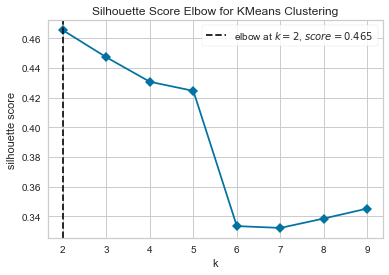

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [40]:
ks = np.arange(2,10, 1)
print(ks)
model = KMeans()
visualizer = KElbowVisualizer(model, k=ks, timings=False, metric= "silhouette")

visualizer.fit(redSideVictoryDiscretized_df.to_numpy())        # Fit the data to the visualizer
visualizer.show()   

In [298]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.4654726285128073
Silhouette score for k=3: 0.4471960103045839
Silhouette score for k=4: 0.4305846919970818
Silhouette score for k=5: 0.425453732505824
Silhouette score for k=6: 0.3334215856201057
Silhouette score for k=7: 0.3324817681503345
Silhouette score for k=8: 0.3381089681251777
Silhouette score for k=9: 0.33903221705629266
Silhouette score for k=10: 0.3381626270642339
Silhouette score for k=11: 0.3504499479858312
Silhouette score for k=12: 0.3508013902361677
Silhouette score for k=13: 0.3438562964061457
Silhouette score for k=14: 0.34989154669409983
Silhouette score for k=15: 0.34997533147281956
Silhouette score for k=16: 0.3530743514668353
Silhouette score for k=17: 0.3533500904865945
Silhouette score for k=18: 0.36310174479661805
Silhouette score for k=19: 0.36056658873406566


Silhouette score for k=20: 0.3598349343525134
Silhouette score for k=25: 0.383119046898615


k = 4

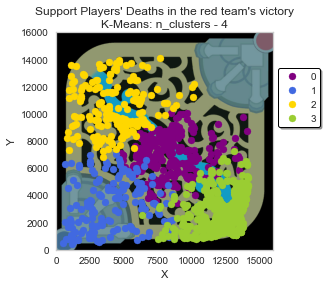

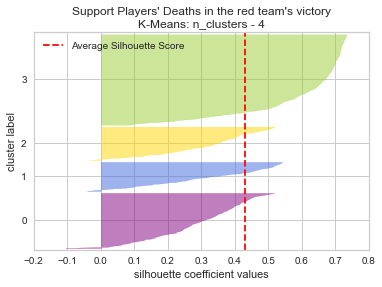

Silhouette score: 0.4305846919970818
3    514
0    314
2    190
1    166
Name: cluster, dtype: int64

Inertia: 794.394477158056

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,8313.493631,6843.477707,-0.308917
1,1,4325.897590,3441.753012,0.463855
2,2,4357.442105,10346.084211,-0.042105
3,3,12133.564202,2840.844358,-0.933852


In [299]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["purple", "royalblue", "gold", "yellowgreen"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

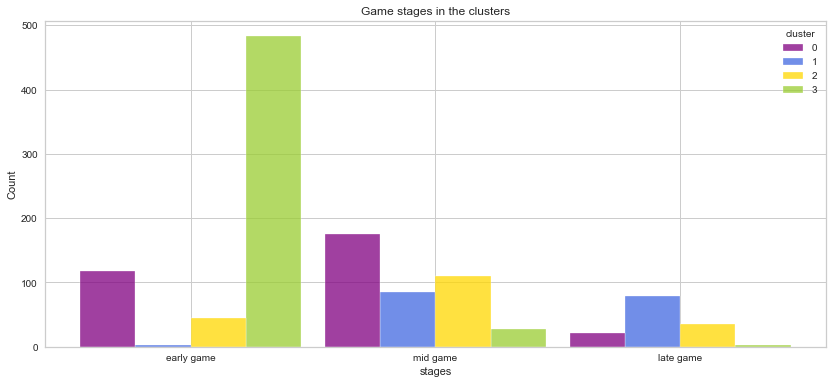

In [300]:
stagesPerClusterV2(redSideVictory_df, colors)

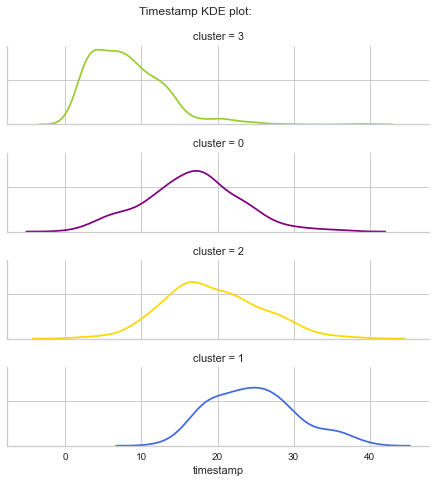

In [301]:
kdeTimestamp(profiling_df, cluster_colors)

K-Means with k = 3

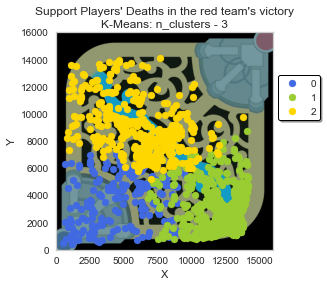

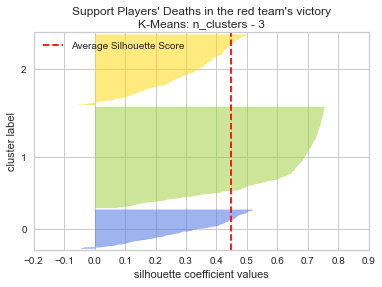

Silhouette score: 0.4471960103045839
1    569
2    396
0    219
Name: cluster, dtype: int64

Inertia: 1031.6707715128562

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,5128.484018,3803.789954,0.351598
1,1,11960.181019,3152.544815,-0.894552
2,2,6223.790404,8887.133838,-0.191919


In [302]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["royalblue", "yellowgreen", "gold"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [303]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,2544.867720,1805.945579,0.548668
1,1,1589.867567,1556.367144,0.334520
2,2,2473.500990,1982.714369,0.634477


In [304]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,11122.0,548.0,7021.0,453.0,1,-1
1,1,14122.0,6767.0,8756.0,773.0,1,-1
2,2,13778.0,792.0,14108.0,5226.0,1,-1


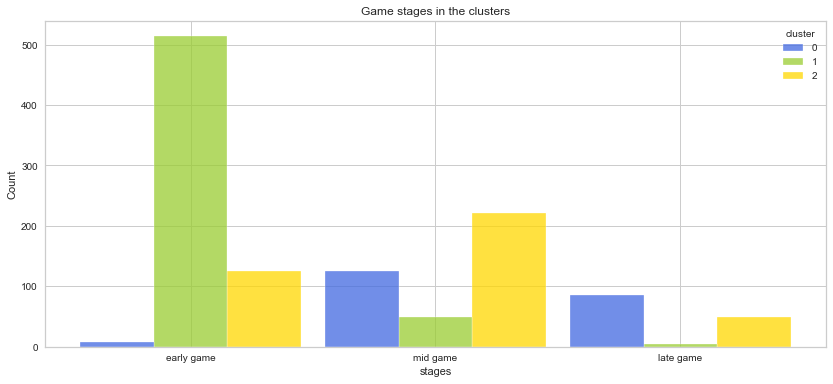

In [305]:
stagesPerClusterV2(redSideVictory_df, colors)

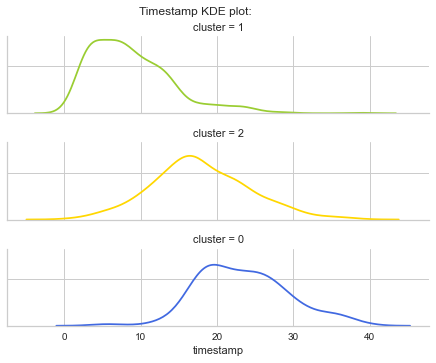

In [306]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [307]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



,matches
Ashe,34
Annie,25
Lux,22
Rakan,21
Nautilus,17
Karma,16
Rell,14
Pyke,11
Renata,10
Heimerdinger,9


Deaths with each champion:

In [308]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Ashe            169
Annie           137
Lux              87
Nautilus         85
Rakan            78
Rell             66
Karma            57
Pyke             51
Caitlyn          47
Heimerdinger     41
Kalista          40
Alistar          37
Renata           37
Amumu            35
Twitch           35
Varus            26
Soraka           20
Maokai           19
Zilean           16
Braum            14
Thresh           14
Lulu             13
Jhin             11
Pantheon          9
Senna             9
Bard              7
Leona             7
Nami              7
Sett              5
Jax               3
Janna             1
Elise             1
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [309]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 32 champions when they won on the red side

Cluster 0 - died with 28 champions:
 ['Alistar' 'Amumu' 'Annie' 'Ashe' 'Bard' 'Braum' 'Caitlyn' 'Heimerdinger'
 'Jhin' 'Kalista' 'Karma' 'Leona' 'Lulu' 'Lux' 'Maokai' 'Nami' 'Nautilus'
 'Pantheon' 'Pyke' 'Rakan' 'Rell' 'Renata' 'Senna' 'Soraka' 'Thresh'
 'Twitch' 'Varus' 'Zilean']
Annie           24
Ashe            22
Rakan           15
Pyke            13
Alistar         13
Nautilus        13
Caitlyn         13
Lux             12
Heimerdinger    11
Twitch          11
Rell            10
Karma            9
Renata           6
Kalista          6
Varus            5
Maokai           5
Thresh           5
Amumu            4
Braum            4
Zilean           4
Soraka           3
Lulu             2
Pantheon         2
Senna            2
Jhin             2
Bard             1
Leona            1
Nami             1
Name: champion, dtype: int64

Cluster 1 - died with 32 champions:
 ['Alistar' 'Amumu' 'Annie' 'Ashe' 'Bard' 'Braum

---
### Clustering Red Team Defeat

In [310]:
redSideDefeat_df = supp_deaths_df[(supp_deaths_df["team"] == "Red") & (supp_deaths_df["victory"] == False)]
redSideDefeat_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
28638,EUW1_6273919322,Red,anonymous 109,euw1,Nautilus,6.569400,13117.0,4538.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
28649,EUW1_6273919322,Red,anonymous 109,euw1,Nautilus,11.841533,13524.0,2454.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
28655,EUW1_6273919322,Red,anonymous 109,euw1,Nautilus,15.525250,9511.0,9927.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
28670,EUW1_6273919322,Red,anonymous 109,euw1,Nautilus,20.900583,9086.0,2202.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
28674,EUW1_6273919322,Red,anonymous 109,euw1,Nautilus,22.024383,5786.0,14043.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283504,KR_6375985152,Red,anonymous 125,kr,Kalista,6.546183,8803.0,6650.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
283509,KR_6375985152,Red,anonymous 125,kr,Kalista,8.852833,12525.0,2622.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
283514,KR_6375985152,Red,anonymous 125,kr,Kalista,10.603550,14074.0,4785.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
283517,KR_6375985152,Red,anonymous 125,kr,Kalista,12.478983,13238.0,4252.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,UTILITY


In [311]:
profiling_df = supp_deaths_df[(supp_deaths_df["team"] == "Red") & (supp_deaths_df["victory"] == False)].copy()

In [312]:
winRateRedSide = (redSideDefeat_df.shape[0]/ redSide_supp_deaths_df.shape[0]) * 100
winRateRedSide

53.146022952117136

In [313]:
players_df = np.unique(redSideDefeat_df["summoner"])
for player in players_df:
    temp_df = redSideDefeat_df[redSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 109 lost 14 matches on the red side
anonymous 109 has an average of 7.285714285714286 deaths per game when losing on the red side

anonymous 110 lost 6 matches on the red side
anonymous 110 has an average of 6.666666666666667 deaths per game when losing on the red side

anonymous 111 lost 22 matches on the red side
anonymous 111 has an average of 5.363636363636363 deaths per game when losing on the red side

anonymous 112 lost 22 matches on the red side
anonymous 112 has an average of 6.454545454545454 deaths per game when losing on the red side

anonymous 113 lost 13 matches on the red side
anonymous 113 has an average of 7.6923076923076925 deaths per game when losing on the red side

anonymous 115 lost 1 matches on the red side
anonymous 115 has an average of 8.0 deaths per game when losing on the red side

anonymous 116 lost 13 matches on the red side
anonymous 116 has an average of 7.153846153846154 deaths per game when losing on the red side

anonymous 117 lost 7 matches

In [314]:
print("Defeat games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 198 matches in which the jungler died at least once
19 players died a total of 1343 times on the red side
Defeat games on red side contains an average of 6.782828282828283 deaths per game


In [315]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

,coordinate_x,coordinate_y,timestamp
28638,13117.0,4538.0,6.569400
28649,13524.0,2454.0,11.841533
28655,9511.0,9927.0,15.525250
28670,9086.0,2202.0,20.900583
28674,5786.0,14043.0,22.024383
...,...,...,...
283504,8803.0,6650.0,6.546183
283509,12525.0,2622.0,8.852833
283514,14074.0,4785.0,10.603550
283517,13238.0,4252.0,12.478983


Time discretization

In [316]:
redSideDefeat_df["timestamp"] = pd.cut(redSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [317]:
np.unique(redSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [318]:
redSideDefeat_df["timestamp"] = redSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [319]:
redSideDefeatDiscretized_df = redSideDefeat_df.copy()

In [320]:
scaler = StandardScaler()
redSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideDefeat_df[["coordinate_x", "coordinate_y"]])
redSideDefeatDiscretized_df

,coordinate_x,coordinate_y,timestamp
28638,1.022842,-0.602083,-1
28649,1.151065,-1.171779,-1
28655,-0.113204,0.871089,0
28670,-0.247098,-1.240667,0
28674,-1.286741,1.996266,0
...,...,...,...
283504,-0.336255,-0.024733,-1
283509,0.836337,-1.125853,-1
283514,1.324339,-0.534561,-1
283517,1.060962,-0.680266,-1


In [321]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.4421090127964125
Silhouette score for k=3: 0.4174739816775395


Silhouette score for k=4: 0.3958512357725098
Silhouette score for k=5: 0.4018189959971661
Silhouette score for k=6: 0.3856987319744702
Silhouette score for k=7: 0.3951641214992599
Silhouette score for k=8: 0.3362384043269207
Silhouette score for k=9: 0.33799223600467776
Silhouette score for k=10: 0.33092574029099026
Silhouette score for k=11: 0.3496972316607827
Silhouette score for k=12: 0.3369078138922743
Silhouette score for k=13: 0.36001958191652184
Silhouette score for k=14: 0.3402949590561108
Silhouette score for k=15: 0.3439046529063407
Silhouette score for k=16: 0.36964437742076806
Silhouette score for k=17: 0.36228972712260993
Silhouette score for k=18: 0.3608928282614026
Silhouette score for k=19: 0.38307634355118864
Silhouette score for k=20: 0.3713554786456996
Silhouette score for k=25: 0.37871241284270774


k = 4

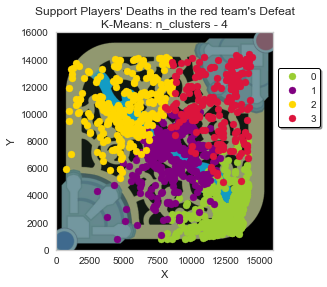

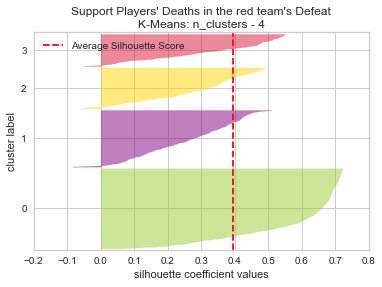

Silhouette score: 0.3958512357725098
0    513
1    363
2    262
3    205
Name: cluster, dtype: int64

Inertia: 970.5659491828186

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,12392.315789,3129.752437,-0.908382
1,1,8620.550964,6853.181818,-0.258953
2,2,5171.057252,10449.068702,0.015267
3,3,11778.131707,10836.751220,0.482927


In [322]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "purple", "gold", "crimson"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"Defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

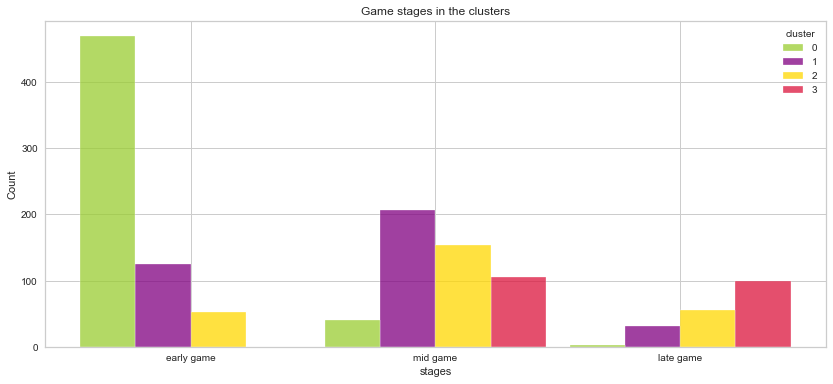

In [323]:
stagesPerClusterV2(redSideDefeat_df, colors)

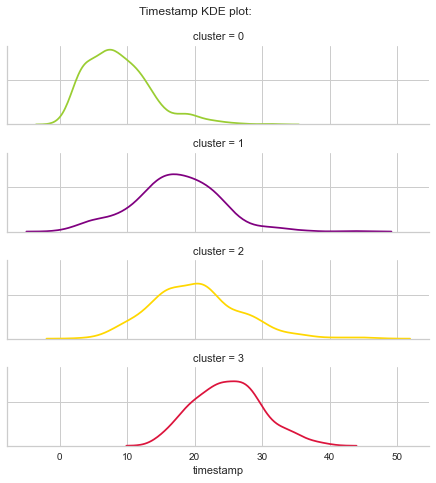

In [324]:
kdeTimestamp(profiling_df, cluster_colors)

K-Means with k = 3

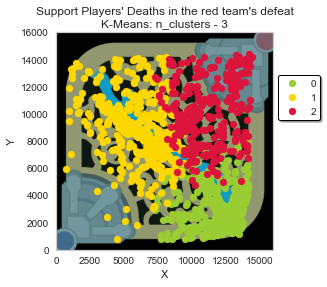

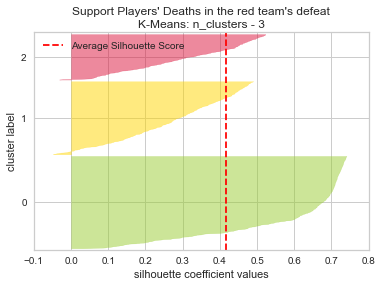

Silhouette score: 0.4174739816775395
0    588
1    465
2    290
Name: cluster, dtype: int64

Inertia: 1219.8647450609126

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,12044.755102,3383.219388,-0.857143
1,1,6293.748387,8885.688172,-0.137634
2,2,11196.355172,10107.862069,0.382759


In [325]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "gold", "crimson"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [326]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,1586.721553,1553.506000,0.377964
1,1,2015.508702,2427.039958,0.641221
2,2,1784.515476,2461.870878,0.513654


In [327]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,14131.0,7286.0,8028.0,789.0,1,-1
1,1,9764.0,725.0,14156.0,797.0,1,-1
2,2,14420.0,7274.0,14414.0,4767.0,1,-1


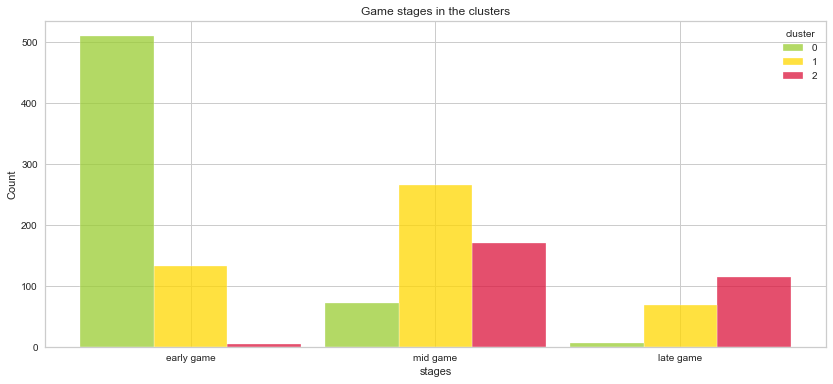

In [328]:
stagesPerClusterV2(redSideDefeat_df, colors)

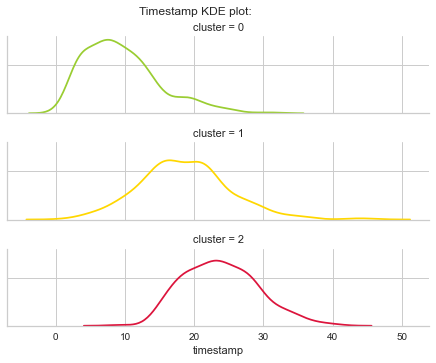

In [329]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [330]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



,matches
Ashe,29
Rakan,20
Annie,18
Nautilus,12
Karma,11
Heimerdinger,9
Kalista,9
Thresh,9
Lux,9
Caitlyn,8


Deaths with each champion:

In [331]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Ashe            196
Annie           126
Rakan           101
Heimerdinger     81
Nautilus         80
Thresh           68
Kalista          68
Karma            67
Lux              62
Caitlyn          56
Twitch           46
Lulu             44
Renata           42
Pyke             38
Maokai           35
Alistar          30
Jhin             27
Janna            26
Varus            23
Nami             19
Leona            15
Rell             13
Bard             13
Swain            11
Braum            10
Sett              9
Senna             9
Blitzcrank        8
MissFortune       7
TahmKench         5
Gragas            4
Shen              4
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [332]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 32 champions when they won on the red side

Cluster 0 - died with 32 champions:
 ['Alistar' 'Annie' 'Ashe' 'Bard' 'Blitzcrank' 'Braum' 'Caitlyn' 'Gragas'
 'Heimerdinger' 'Janna' 'Jhin' 'Kalista' 'Karma' 'Leona' 'Lulu' 'Lux'
 'Maokai' 'MissFortune' 'Nami' 'Nautilus' 'Pyke' 'Rakan' 'Rell' 'Renata'
 'Senna' 'Sett' 'Shen' 'Swain' 'TahmKench' 'Thresh' 'Twitch' 'Varus']
Ashe            98
Annie           64
Heimerdinger    41
Rakan           37
Thresh          31
Kalista         29
Nautilus        28
Karma           26
Caitlyn         25
Lux             24
Lulu            23
Renata          18
Twitch          16
Pyke            14
Alistar         13
Janna           13
Jhin            13
Maokai          12
Varus           10
Leona            8
Nami             8
Swain            6
Senna            6
Braum            4
MissFortune      4
Blitzcrank       3
Bard             3
Shen             3
Rell             2
Sett             2
TahmKench        2
Gragas          

---
### Clustering Blue Team Victory

In [333]:
blueSideVictory_df = supp_deaths_df[(supp_deaths_df["team"] == "Blue") & (supp_deaths_df["victory"] == True)]
blueSideVictory_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
28844,EUW1_6271689872,Blue,anonymous 109,euw1,Ashe,14.047233,12483.0,3159.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
28848,EUW1_6271689872,Blue,anonymous 109,euw1,Ashe,15.616500,8065.0,13830.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
29120,EUW1_6270972804,Blue,anonymous 110,euw1,Pyke,2.716667,12574.0,1847.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
29152,EUW1_6270972804,Blue,anonymous 110,euw1,Pyke,16.728700,8326.0,8635.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
29453,EUW1_6272996504,Blue,anonymous 111,euw1,Annie,2.224250,11298.0,1028.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282417,EUW1_6289478977,Blue,anonymous 113,euw1,Kalista,27.282183,2477.0,7021.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
282424,EUW1_6289478977,Blue,anonymous 113,euw1,Kalista,30.753033,12026.0,7149.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
283155,KR_6375966263,Blue,anonymous 123,kr,Karma,4.021000,11503.0,1076.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
283168,KR_6375966263,Blue,anonymous 123,kr,Karma,11.636833,10140.0,7828.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,UTILITY


In [334]:
profiling_df = supp_deaths_df[(supp_deaths_df["team"] == "Blue") & (supp_deaths_df["victory"] == True)].copy()

In [335]:
winsBlueSide = len(np.unique(blueSideVictory_df["gameId"]))

In [336]:
winRateRedSide = (winsBlueSide / gamesBlueSide) * 100
winRateRedSide

51.162790697674424

In [337]:
winRateBlueSide = (blueSideVictory_df.shape[0]/ blueSide_supp_deaths_df.shape[0]) * 100
winRateBlueSide

38.811346240432236

In [338]:
players_df = np.unique(blueSideVictory_df["summoner"])
for player in players_df:
    temp_df = blueSideVictory_df[blueSideVictory_df["summoner"] == player]
    print("{} won {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 109 won 11 matches on the blue side
anonymous 109 has an average of 3.3636363636363638 deaths per game when winning on the blue side

anonymous 110 won 8 matches on the blue side
anonymous 110 has an average of 3.5 deaths per game when winning on the blue side

anonymous 111 won 28 matches on the blue side
anonymous 111 has an average of 3.4642857142857144 deaths per game when winning on the blue side

anonymous 112 won 20 matches on the blue side
anonymous 112 has an average of 5.45 deaths per game when winning on the blue side

anonymous 113 won 16 matches on the blue side
anonymous 113 has an average of 6.375 deaths per game when winning on the blue side

anonymous 115 won 4 matches on the blue side
anonymous 115 has an average of 3.0 deaths per game when winning on the blue side

anonymous 116 won 6 matches on the blue side
anonymous 116 has an average of 4.666666666666667 deaths per game when winning on the blue side

anonymous 117 won 9 matches on the blue side
anonymou

In [339]:
print("Victory games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 198 matches in which the jungler died at least once
19 players died a total of 862 times on the blue side
Victory games on blue side contains an average of 4.353535353535354 deaths per game


In [340]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

,coordinate_x,coordinate_y,timestamp
28844,12483.0,3159.0,14.047233
28848,8065.0,13830.0,15.616500
29120,12574.0,1847.0,2.716667
29152,8326.0,8635.0,16.728700
29453,11298.0,1028.0,2.224250
...,...,...,...
282417,2477.0,7021.0,27.282183
282424,12026.0,7149.0,30.753033
283155,11503.0,1076.0,4.021000
283168,10140.0,7828.0,11.636833


Time discretization

In [341]:
blueSideVictory_df["timestamp"] = pd.cut(blueSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [342]:
np.unique(blueSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [343]:
blueSideVictory_df["timestamp"] = blueSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [344]:
blueSideVictoryDiscretized_df = blueSideVictory_df.copy()

In [345]:
scaler = StandardScaler()
blueSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideVictory_df[["coordinate_x", "coordinate_y"]])
blueSideVictoryDiscretized_df

,coordinate_x,coordinate_y,timestamp
28844,0.947660,-0.752444,-1
28848,-0.471620,2.137559,0
29120,0.976893,-1.107771,-1
29152,-0.387774,0.730609,0
29453,0.566979,-1.329579,-1
...,...,...,...
282417,-2.266761,0.293493,1
282424,0.800849,0.328158,1
283155,0.632835,-1.316579,-1
283168,0.194973,0.512051,-1


In [346]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.4622622040893857
Silhouette score for k=3: 0.4515213555797947


Silhouette score for k=4: 0.4214600528374225
Silhouette score for k=5: 0.42604713300951547
Silhouette score for k=6: 0.3398159230326932
Silhouette score for k=7: 0.3372053360943408
Silhouette score for k=8: 0.3486902727702103
Silhouette score for k=9: 0.3584180650496031
Silhouette score for k=10: 0.3572279372254677
Silhouette score for k=11: 0.3632792567693106
Silhouette score for k=12: 0.3662952295821423
Silhouette score for k=13: 0.3664369101733626
Silhouette score for k=14: 0.3648294791733667
Silhouette score for k=15: 0.36317876992756865
Silhouette score for k=16: 0.3575436582036735
Silhouette score for k=17: 0.3653050319829497
Silhouette score for k=18: 0.3697485392046838
Silhouette score for k=19: 0.3662565388369858
Silhouette score for k=20: 0.3724790443910903
Silhouette score for k=25: 0.38910360256089765


k = 4

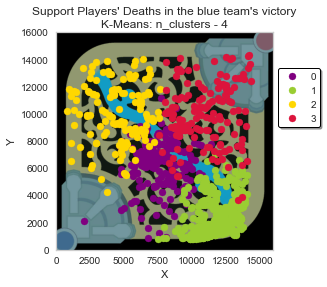

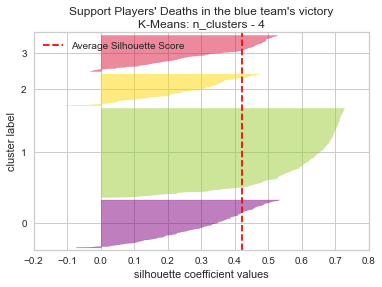

Silhouette score: 0.4214600528374225
1    374
0    202
3    152
2    134
Name: cluster, dtype: int64

Inertia: 595.0251758492797

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,7612.252475,6355.351485,-0.504950
1,1,11800.331551,2591.767380,-0.938503
2,2,4497.417910,10050.761194,-0.014925
3,3,10946.460526,9987.236842,0.361842


In [347]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["purple", "yellowgreen", "gold", "crimson"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

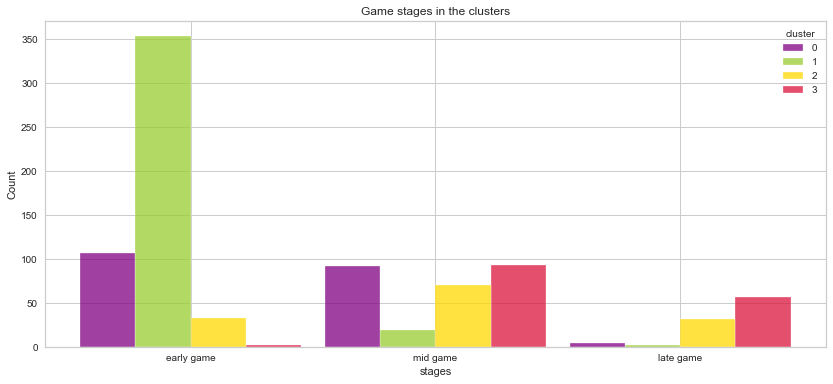

In [348]:
stagesPerClusterV2(blueSideVictory_df, colors)

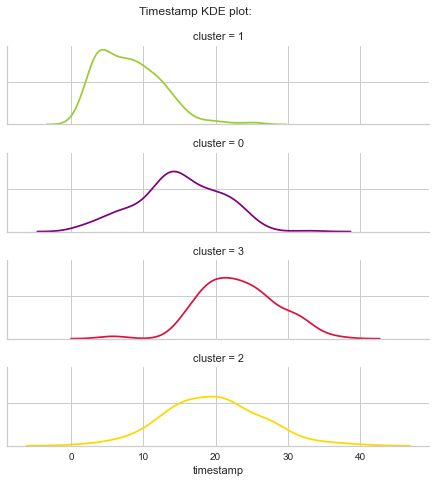

In [349]:
kdeTimestamp(profiling_df, cluster_colors)

K-Means with k = 3

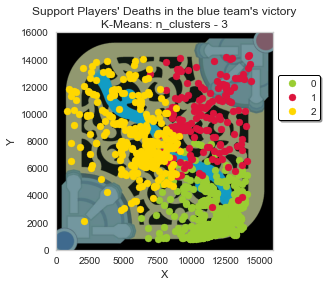

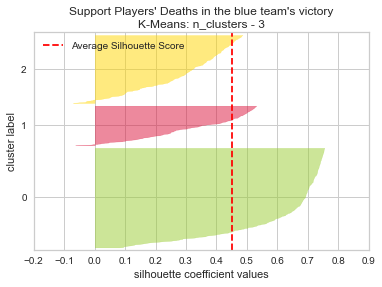

Silhouette score: 0.4515213555797947
0    414
2    283
1    165
Name: cluster, dtype: int64

Inertia: 741.4346084801591

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,11504.922705,2813.743961,-0.929952
1,1,10892.484848,9688.503030,0.333333
2,2,5855.890459,8319.685512,-0.247350


In [350]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "crimson", "gold"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [351]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,1547.977084,1632.410009,0.264523
1,1,1808.002462,2438.252361,0.520295
2,2,1953.482147,2451.522347,0.653032


In [352]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,14064.0,6293.0,7828.0,796.0,1,-1
1,1,14322.0,6923.0,14363.0,3169.0,1,-1
2,2,9128.0,826.0,14059.0,2123.0,1,-1


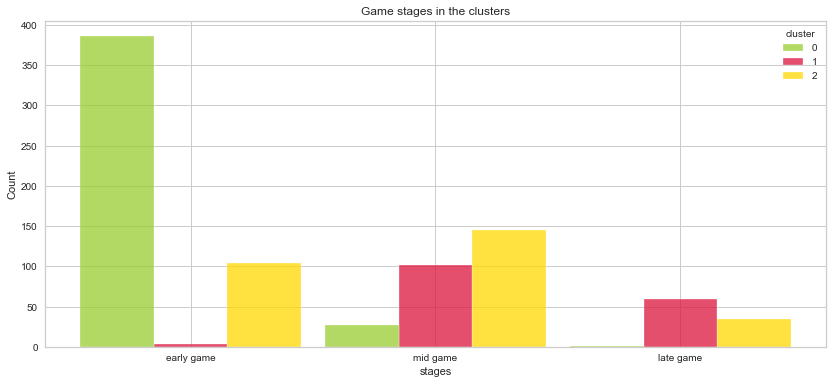

In [353]:
stagesPerClusterV2(blueSideVictory_df, colors)

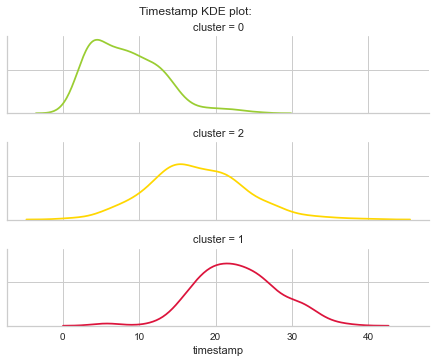

In [354]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [355]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



,matches
Ashe,38
Annie,22
Rakan,16
Karma,15
Nautilus,12
Lulu,11
Heimerdinger,9
Lux,9
Pyke,7
Rell,7


Deaths with each champion:

In [356]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Ashe            145
Annie            94
Rakan            71
Nautilus         63
Karma            57
Heimerdinger     46
Kalista          44
Lux              40
Lulu             31
Pyke             26
Rell             26
Renata           24
Caitlyn          22
Alistar          20
Thresh           18
Senna            18
Amumu            16
Twitch           16
Varus            15
Braum            14
Blitzcrank        9
Maokai            6
Sett              6
Janna             6
Neeko             5
Sona              5
Xerath            4
TahmKench         4
Bard              3
Jax               3
MissFortune       2
Morgana           2
Shen              1
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [357]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 33 champions when they won on the red side

Cluster 0 - died with 31 champions:
 ['Alistar' 'Amumu' 'Annie' 'Ashe' 'Bard' 'Braum' 'Caitlyn' 'Heimerdinger'
 'Janna' 'Jax' 'Kalista' 'Karma' 'Lulu' 'Lux' 'Maokai' 'MissFortune'
 'Nautilus' 'Neeko' 'Pyke' 'Rakan' 'Rell' 'Renata' 'Senna' 'Sett' 'Shen'
 'Sona' 'TahmKench' 'Thresh' 'Twitch' 'Varus' 'Xerath']
Ashe            85
Annie           51
Karma           33
Nautilus        30
Rakan           21
Lux             19
Kalista         15
Heimerdinger    15
Lulu            15
Rell            15
Thresh          12
Senna           12
Renata          10
Pyke            10
Alistar          9
Caitlyn          9
Braum            9
Twitch           7
Amumu            7
Varus            5
Neeko            4
Janna            3
Bard             3
Xerath           3
Maokai           3
MissFortune      2
Jax              2
Sett             2
Shen             1
TahmKench        1
Sona             1
Name: champion, dtype: int64



---
### Clustering Blue Team Defeat

In [358]:
blueSideDefeat_df = supp_deaths_df[(supp_deaths_df["team"] == "Blue") & (supp_deaths_df["victory"] == False)]
blueSideDefeat_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
28583,EUW1_6273968397,Blue,anonymous 109,euw1,Heimerdinger,3.612900,10560.0,2950.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
28587,EUW1_6273968397,Blue,anonymous 109,euw1,Heimerdinger,5.596067,13533.0,1246.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
28597,EUW1_6273968397,Blue,anonymous 109,euw1,Heimerdinger,10.835167,10907.0,3305.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
28614,EUW1_6273968397,Blue,anonymous 109,euw1,Heimerdinger,19.374700,5576.0,7461.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
28619,EUW1_6273968397,Blue,anonymous 109,euw1,Heimerdinger,22.131900,5145.0,9603.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283706,KR_6375965891,Blue,anonymous 126,kr,Karma,7.385033,13067.0,2057.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
283708,KR_6375965891,Blue,anonymous 126,kr,Karma,8.299733,10542.0,1289.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
283716,KR_6375965891,Blue,anonymous 126,kr,Karma,12.694800,13065.0,3696.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
283721,KR_6375965891,Blue,anonymous 126,kr,Karma,14.493567,11843.0,1284.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,UTILITY


In [359]:
profiling_df = supp_deaths_df[(supp_deaths_df["team"] == "Blue") & (supp_deaths_df["victory"] == False)].copy()

In [360]:
winRateBlueSide = (blueSideDefeat_df.shape[0]/ blueSide_supp_deaths_df.shape[0]) * 100
winRateBlueSide

61.18865375956776

In [361]:
players_df = np.unique(blueSideDefeat_df["summoner"])
for player in players_df:
    temp_df = blueSideDefeat_df[blueSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 109 lost 7 matches on the blue side
anonymous 109 has an average of 6.428571428571429 deaths per game when losing on the blue side

anonymous 110 lost 5 matches on the blue side
anonymous 110 has an average of 5.6 deaths per game when losing on the blue side

anonymous 111 lost 14 matches on the blue side
anonymous 111 has an average of 6.142857142857143 deaths per game when losing on the blue side

anonymous 112 lost 21 matches on the blue side
anonymous 112 has an average of 7.285714285714286 deaths per game when losing on the blue side

anonymous 113 lost 13 matches on the blue side
anonymous 113 has an average of 9.0 deaths per game when losing on the blue side

anonymous 115 lost 7 matches on the blue side
anonymous 115 has an average of 7.0 deaths per game when losing on the blue side

anonymous 116 lost 10 matches on the blue side
anonymous 116 has an average of 7.5 deaths per game when losing on the blue side

anonymous 117 lost 6 matches on the blue side
anonymous 11

In [362]:
print("Defeat games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 189 matches in which the jungler died at least once
19 players died a total of 1359 times on the blue side
Defeat games on blue side contains an average of 7.190476190476191 deaths per game


In [363]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

,coordinate_x,coordinate_y,timestamp
28583,10560.0,2950.0,3.612900
28587,13533.0,1246.0,5.596067
28597,10907.0,3305.0,10.835167
28614,5576.0,7461.0,19.374700
28619,5145.0,9603.0,22.131900
...,...,...,...
283706,13067.0,2057.0,7.385033
283708,10542.0,1289.0,8.299733
283716,13065.0,3696.0,12.694800
283721,11843.0,1284.0,14.493567


Time discretization

In [364]:
blueSideDefeat_df["timestamp"] = pd.cut(blueSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [365]:
np.unique(blueSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [366]:
blueSideDefeat_df["timestamp"] = blueSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [367]:
blueSideDefeatDiscretized_df = blueSideDefeat_df.copy()

In [368]:
scaler = StandardScaler()
blueSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideDefeat_df[["coordinate_x", "coordinate_y"]])
blueSideDefeatDiscretized_df

,coordinate_x,coordinate_y,timestamp
28583,0.667543,-0.623405,-1
28587,1.462662,-1.144036,-1
28597,0.760347,-0.514940,-1
28614,-0.665412,0.754862,0
28619,-0.780681,1.409317,0
...,...,...,...
283706,1.338032,-0.896247,-1
283708,0.662729,-1.130898,-1
283716,1.337497,-0.395476,-1
283721,1.010677,-1.132425,-1


In [369]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.4478584342670146


Silhouette score for k=3: 0.4246427001368616
Silhouette score for k=4: 0.40850655433816147
Silhouette score for k=5: 0.42254726526733255
Silhouette score for k=6: 0.4063460378460389
Silhouette score for k=7: 0.41315737471809333
Silhouette score for k=8: 0.3336777468935045
Silhouette score for k=9: 0.3470677681918995
Silhouette score for k=10: 0.3498068893262522
Silhouette score for k=11: 0.35312206814525443
Silhouette score for k=12: 0.3597234377838782
Silhouette score for k=13: 0.35947713824409055
Silhouette score for k=14: 0.36174620387556006
Silhouette score for k=15: 0.3674654935746645
Silhouette score for k=16: 0.3678882180284797
Silhouette score for k=17: 0.3729834549533845
Silhouette score for k=18: 0.36893131739855095
Silhouette score for k=19: 0.3770798360011384
Silhouette score for k=20: 0.37469074193874924
Silhouette score for k=25: 0.38313409774072754


k = 4

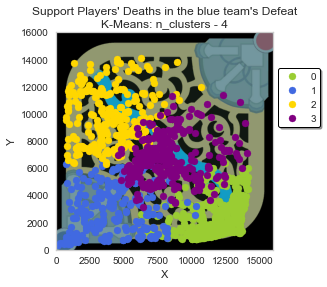

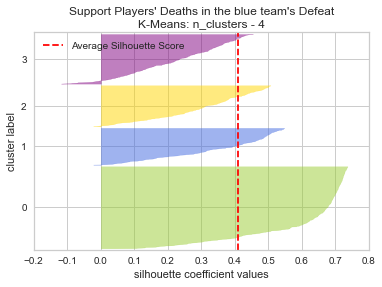

Silhouette score: 0.40850655433816147
0    532
3    322
2    266
1    239
Name: cluster, dtype: int64

Inertia: 1001.392936656841

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,11662.843985,2402.915414,-0.921053
1,1,4357.276151,3162.083682,0.410042
2,2,4018.800752,9690.838346,0.015038
3,3,8211.102484,6739.332298,-0.304348


In [370]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "royalblue", "gold", "purple"])
colors = visualizeResults(blueSideDefeat_df, blueSideDefeatDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"Defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

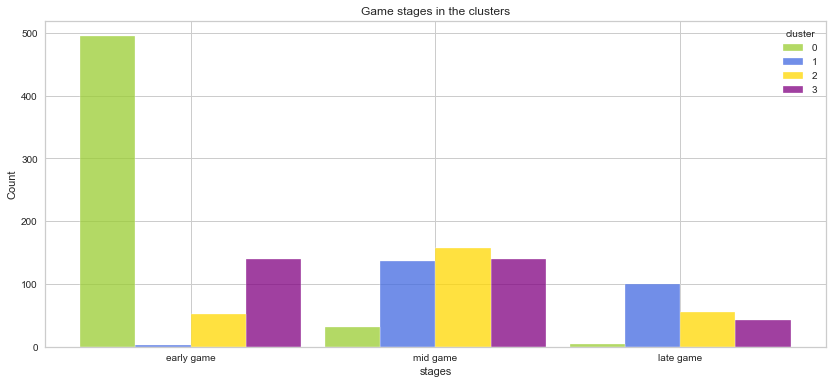

In [371]:
stagesPerClusterV2(blueSideDefeat_df, colors)

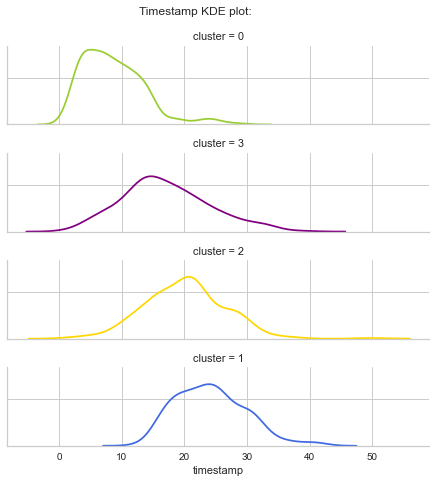

In [372]:
kdeTimestamp(profiling_df, cluster_colors)

K-Means with k = 3

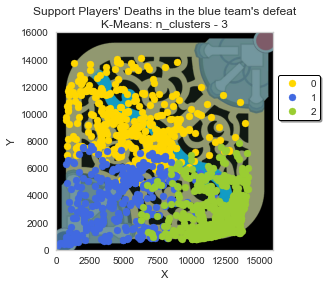

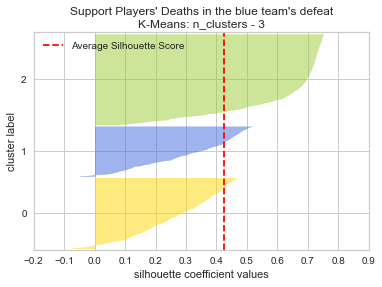

Silhouette score: 0.4246427001368616
2    583
0    455
1    321
Name: cluster, dtype: int64

Inertia: 1243.8063359551468

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,5772.261538,8787.643956,-0.197802
1,1,4983.059190,3785.504673,0.383178
2,2,11548.982847,2690.209262,-0.890223


In [373]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "royalblue", "yellowgreen"])
colors = visualizeResults(blueSideDefeat_df, blueSideDefeatDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors ,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [374]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,2593.936740,2008.467872,0.673188
1,1,2458.300554,1934.817241,0.529118
2,2,1593.826405,1554.887380,0.343961


In [375]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,13901.0,768.0,14106.0,4880.0,1,-1
1,1,11942.0,171.0,7617.0,375.0,1,-1
2,2,14125.0,6246.0,7893.0,808.0,1,-1


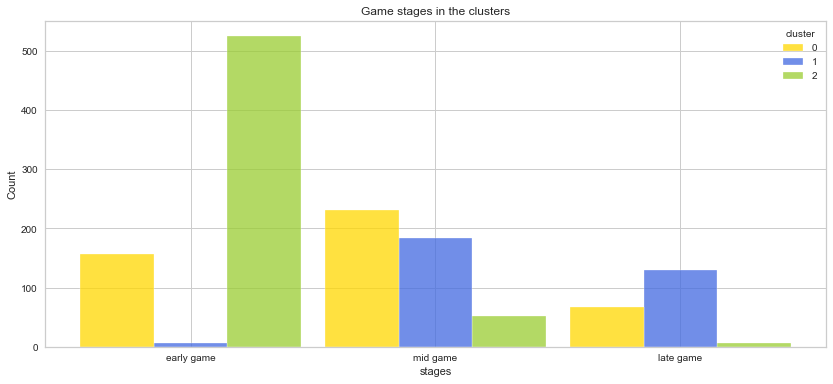

In [376]:
stagesPerClusterV2(blueSideDefeat_df, colors)

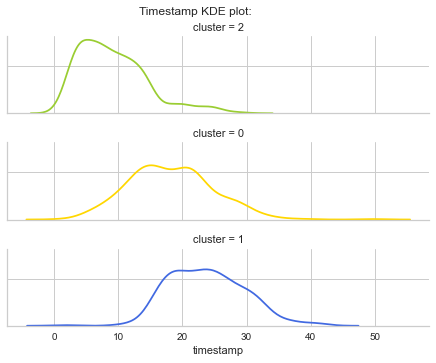

In [377]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [378]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



,matches
Ashe,26
Annie,23
Nautilus,18
Lux,16
Karma,12
Rakan,11
Heimerdinger,8
Pyke,8
Caitlyn,7
Renata,7


Deaths with each champion:

In [379]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Ashe            192
Annie           172
Nautilus        139
Lux              97
Caitlyn          75
Karma            68
Renata           60
Pyke             59
Heimerdinger     56
Twitch           50
Rakan            49
Lulu             35
Rell             34
Thresh           27
Nami             27
Leona            22
Braum            21
Jhin             16
Morgana          15
Kalista          14
Gragas           12
Varus            11
Zac              10
Teemo            10
MissFortune       9
Bard              9
Alistar           8
Soraka            8
Vi                7
Sion              7
Sett              7
Xayah             7
Seraphine         6
Yuumi             6
Blitzcrank        5
Janna             5
Senna             4
Name: champion, dtype: int64

In [380]:
championsDeaths = profiling_df["champion"].value_counts().index.tolist()
test3 = []
index = 0
aux = 10
for ex in profiling_df["champion"].value_counts():
    #print(ex)
    testrow= {}
    testrow["champion"] = championsDeaths[index]
    testrow["deaths"] = ex
    testrow["x"] = aux
    testrow["y"] = 10
    test3.append(testrow)
    #print(championsDeaths[index])
    index += 1
    aux += 10
test3 = pd.DataFrame(test3)

fig = px.scatter(test3, x="x", y="y",
	         size="deaths", color="champion",
                 hover_name="champion", log_x=True, size_max=60)
fig.show()

In [381]:
""" test = pd.DataFrame()
test[["champion","coordinate_x", "coordinate_y"]] = profiling_df[["champion", "coordinate_x", "coordinate_y"]].copy()

index = 0
test2 = []
for row in test.iterrows():
    #print(row[1][0])
    champion = row[1][0]
    index = 0
    for ex in profiling_df["champion"].value_counts():
        #print(ex)
        if(championsDeaths[index] == champion):

            #print(championsDeaths[index] + "=" + champion)
            #print(ex)
            test2.append(ex)
        #print(championsDeaths[index])
        index += 1

test["deaths"] = test2
test

fig = px.scatter(test, x="coordinate_x", y="coordinate_y",
	         size="deaths", color="champion",
                 hover_name="champion", log_x=True, size_max=60)
fig.show() """

' test = pd.DataFrame()\ntest[["champion","coordinate_x", "coordinate_y"]] = profiling_df[["champion", "coordinate_x", "coordinate_y"]].copy()\n\nindex = 0\ntest2 = []\nfor row in test.iterrows():\n    #print(row[1][0])\n    champion = row[1][0]\n    index = 0\n    for ex in profiling_df["champion"].value_counts():\n        #print(ex)\n        if(championsDeaths[index] == champion):\n\n            #print(championsDeaths[index] + "=" + champion)\n            #print(ex)\n            test2.append(ex)\n        #print(championsDeaths[index])\n        index += 1\n\ntest["deaths"] = test2\ntest\n\nfig = px.scatter(test, x="coordinate_x", y="coordinate_y",\n\t         size="deaths", color="champion",\n                 hover_name="champion", log_x=True, size_max=60)\nfig.show() '

Number of deaths per champions in each cluster:

In [382]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 37 champions when they won on the red side

Cluster 0 - died with 35 champions:
 ['Alistar' 'Annie' 'Ashe' 'Bard' 'Blitzcrank' 'Braum' 'Caitlyn' 'Gragas'
 'Heimerdinger' 'Janna' 'Jhin' 'Kalista' 'Karma' 'Leona' 'Lulu' 'Lux'
 'MissFortune' 'Morgana' 'Nami' 'Nautilus' 'Pyke' 'Rakan' 'Rell' 'Renata'
 'Seraphine' 'Sett' 'Sion' 'Soraka' 'Teemo' 'Thresh' 'Twitch' 'Varus' 'Vi'
 'Xayah' 'Zac']
Ashe            69
Annie           58
Nautilus        48
Pyke            26
Lux             25
Caitlyn         23
Twitch          21
Rakan           19
Karma           17
Renata          14
Heimerdinger    14
Leona           13
Rell            12
Morgana         10
Thresh          10
Lulu            10
Nami             9
Gragas           7
Jhin             5
Zac              5
Bard             5
Blitzcrank       4
Braum            4
Varus            3
Kalista          3
Vi               3
Teemo            3
Sion             3
Sett             3
Alistar          2
Seraphine    

---

### Blue Win Rate vs Red Win Rate

In [383]:
wins_df = supp_deaths_df[supp_deaths_df["victory"] == True]
wins_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
28689,EUW1_6273884721,Red,anonymous 109,euw1,Nami,3.552317,12485.0,1749.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
28695,EUW1_6273884721,Red,anonymous 109,euw1,Nami,7.317750,12880.0,2947.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
28701,EUW1_6273884721,Red,anonymous 109,euw1,Nami,10.592233,14033.0,4482.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
28706,EUW1_6273884721,Red,anonymous 109,euw1,Nami,11.556400,9396.0,6289.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
28735,EUW1_6273884721,Red,anonymous 109,euw1,Nami,22.504467,9973.0,9337.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283570,KR_6376046864,Red,anonymous 126,kr,Heimerdinger,20.628233,11858.0,4147.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
283572,KR_6376046864,Red,anonymous 126,kr,Heimerdinger,21.758633,7094.0,6472.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
283587,KR_6376046864,Red,anonymous 126,kr,Heimerdinger,26.199883,3156.0,4119.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,UTILITY
283594,KR_6376046864,Red,anonymous 126,kr,Heimerdinger,29.843583,5932.0,5798.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,UTILITY


In [384]:
wins = len(np.unique(wins_df["gameId"]))
wins

452

In [385]:
b = (winsBlueSide/ wins) * 100
r = (winsRedSide/ wins) * 100

print("Win Rates:")
print(" Red: {} vs Blue: {}".format(r, b))

Win Rates:
 Red: 56.19469026548673 vs Blue: 43.80530973451327


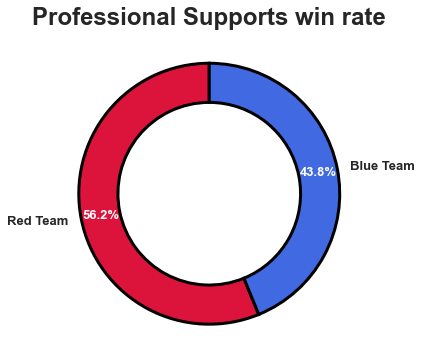

In [386]:
fig, ax = plt.subplots(figsize=(6, 6))
 
wedgeprops = {'width':0.3, 'edgecolor':'black', 'linewidth':3}

_, texts, autotexts = ax.pie([r,b], 
       wedgeprops= wedgeprops, 
       startangle=90,
       labels=["Red Team", "Blue Team"],
       autopct='%1.1f%%',
       pctdistance=0.85,
       colors=['crimson', 'royalblue'])

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight("bold")
    autotext.set_fontsize(13)

texts[0].set_fontsize(13)
texts[1].set_fontsize(13)
texts[0].set_fontweight("bold")
texts[1].set_fontweight("bold")

plt.title('Professional Supports win rate', fontsize=24, loc='center', fontweight="bold")

plt.show()

In [387]:
b = (blueSideVictory_df.shape[0]/ wins_df.shape[0]) * 100
r = (redSideVictory_df.shape[0]/ wins_df.shape[0]) * 100

print("Win Rates:")
print(" Red: {} vs Blue: {}".format(r, b))

Win Rates:
 Red: 57.86901270772239 vs Blue: 42.13098729227762
